In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/randomforestdata/sample_submission.csv
/kaggle/input/randomforestdata/data_description.txt
/kaggle/input/randomforestdata/train.csv
/kaggle/input/randomforestdata/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv('/kaggle/input/randomforestdata/train.csv')


გასუფთავების ეტაპი

In [3]:


df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, errors='ignore')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [4]:

df['street_num'] = np.where(df['Street'] == 'Pave', 1, 0)
df['central_air_num'] = np.where(df['CentralAir'] == 'Y', 1, 0)
df.drop(columns=['Street', 'CentralAir'], inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,street_num,central_air_num
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,1,1
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,1,1
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,1,1
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,1,1
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,175000,1,1
1456,1457,20,RL,85.0,13175,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,210000,1,1
1457,1458,70,RL,66.0,9042,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,266500,1,1
1458,1459,20,RL,68.0,9717,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,142125,1,1


In [5]:


y = df['SalePrice']
X = df.drop(columns=['SalePrice', 'Id'], errors='ignore')


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_cols = X.select_dtypes(include=[np.number]).columns
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numeric_cols)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [7]:

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'street_num', 'central_air_num'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [8]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)


In [9]:
def print_metrics(true, pred, dataset=''):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    print(f"{dataset} RMSE: {rmse:.2f}")
    print(f"{dataset} MAE: {mae:.2f}")
    print(f"{dataset} R²: {r2:.4f}")


In [10]:

print_metrics(y_train, pred_train, dataset='Train')
print_metrics(y_test, pred_test, dataset='Test')


Train RMSE: 11166.38
Train MAE: 6696.78
Train R²: 0.9791
Test RMSE: 28838.16
Test MAE: 18081.33
Test R²: 0.8916


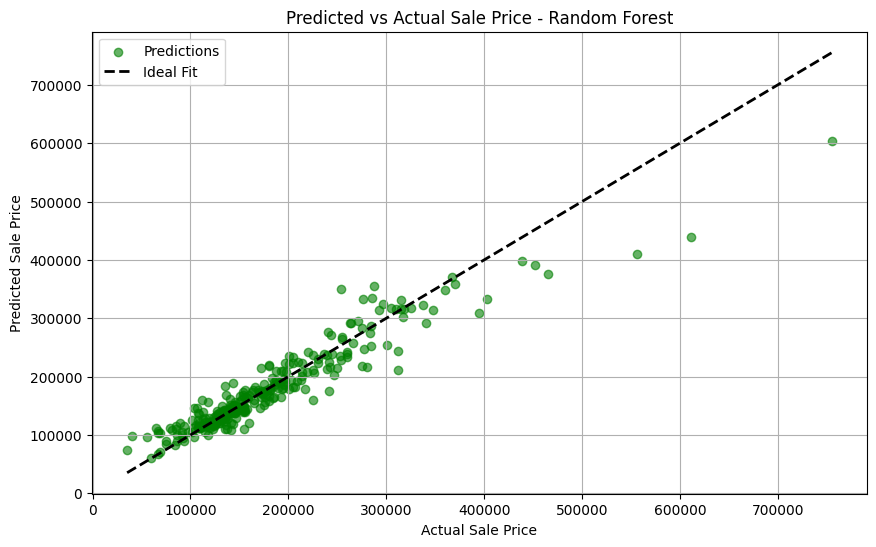

In [11]:
# Step 11: Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_test, alpha=0.6, color='green', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual Sale Price - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
!pip install dagshub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 4.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      Successfully uninstalled dacite-1.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.2 requires dacite>=1.8, but you have dacite 1.6.0 which is incompatible.


დაგსჰაბთან დაკავშირება

In [13]:
import dagshub
dagshub.init(repo_owner='nurch22', repo_name='my-first-repo', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=84327713-9330-4838-aab7-af6da5325fc9&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=ca703dc616dc7ff2db62cfcf0b0baaeeada9500194b5c8e8bfc75761a89acca0




Output()

Accessing as nurch22

Initialized MLflow to track repo "nurch22/my-first-repo"

Repository nurch22/my-first-repo initialized!

In [14]:
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 51.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 80.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.3 MB/s eta 0:00:00


mlflow-ზე ატვირთვის ნაწილი


2025/04/09 16:44:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run abundant-robin-698 at: https://dagshub.com/nurch22/my-first-repo.mlflow/#/experiments/0/runs/a8cd4146a34048be9d6b093889c7d25b
🧪 View experiment at: https://dagshub.com/nurch22/my-first-repo.mlflow/#/experiments/0


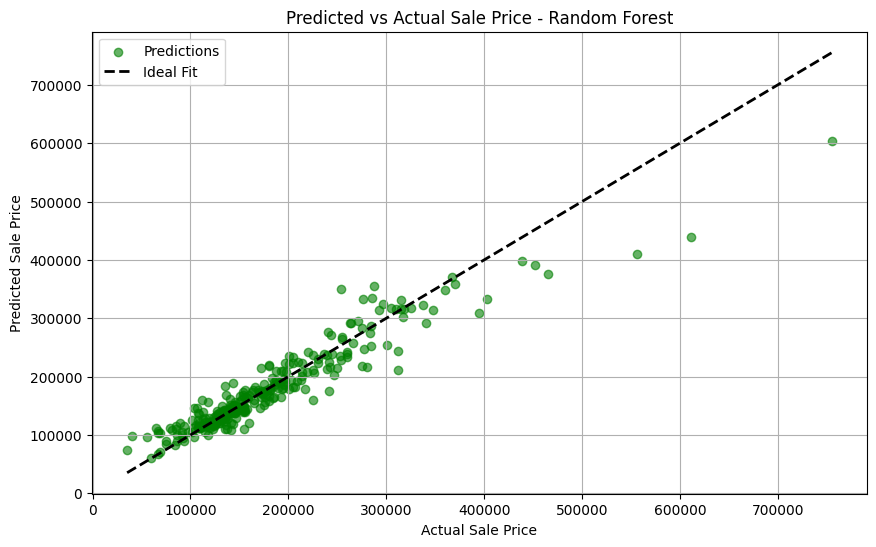

In [15]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


with mlflow.start_run():
    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    # Metrics
    def eval_metrics(true, pred):
        rmse = np.sqrt(mean_squared_error(true, pred))
        mae = mean_absolute_error(true, pred)
        r2 = r2_score(true, pred)
        return rmse, mae, r2

    train_rmse, train_mae, train_r2 = eval_metrics(y_train, pred_train)
    test_rmse, test_mae, test_r2 = eval_metrics(y_test, pred_test)

    # Log params
    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("imputer_strategy", "median")

    # Log metrics
    mlflow.log_metric("train_rmse", train_rmse)
    mlflow.log_metric("train_mae", train_mae)
    mlflow.log_metric("train_r2", train_r2)
    mlflow.log_metric("test_rmse", test_rmse)
    mlflow.log_metric("test_mae", test_mae)
    mlflow.log_metric("test_r2", test_r2)

    # Log model
    mlflow.sklearn.log_model(pipeline, "random_forest_model")

    # Optional: Save and log prediction plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, pred_test, alpha=0.6, color='green', label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel("Actual Sale Price")
    plt.ylabel("Predicted Sale Price")
    plt.title("Predicted vs Actual Sale Price - Random Forest")
    plt.legend()
    plt.grid(True)
    plt.savefig("pred_vs_actual.png")
    mlflow.log_artifact("pred_vs_actual.png")